# Decision Analytics with Python

## JupyterLab Notebooks for Analysis

Here, we'll demonstrate how we can use Python to conduct data analysis faster and, in some cases, more efficiently than we can do in Microsoft Excel. 

We'll use JupyterLab in Anaconda to write and execute our code for the in-class examples. In line with what [more scientists are doing today](https://www.nature.com/articles/d41586-018-07196-1), we'll use the JupyterLab notebooks to create a "computational narrative" to keep a legacy of our research notes and questions, data hypotheses and questions, data analysis, results, visualizations, and conlusions. The Jupyter notebooks allow us to combine plain text, Python code, and other media in a single document that we can also share with others as a document, gist, or through a GitHub repository.

We'll utilize the Jupyter cell layout to organize, document, and conduct our analysis so that we can continue to use these functions and methods for future analysis. 

## Organizing our Analysis

There are many ways to organize documentation and analysis, but our main objective is always the same: make it easy for us (the analyst) and potential collaborators to understand what we are doing or have done. It's tempting to simply write code to get things accomplished quickly, but this leaves little room for improvement (unless you have an extremely good memory) because it makes it difficult to come back to and build on your work, and this makes it difficult for others to understand what you've done to potentially help and further your work. 

### Markdown Formatting for Headers and Cell Text 

We can use [Markdown formatting](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html) for our notes (the same kind of formatting we used in our GitHub README files) to add headers, text formatting, colors, links, images, etc.

By also organizing our notebooks with cells as headers, we can use the JupyterLab [Table of Contents extension](https://github.com/jupyterlab/jupyterlab-toc) to navigate longer notebooks.

### Markdown and In-cell notes 

In this analysis, we'll use the markdown notes to type out longer explanations for our notes and potential future questions, and we'll use `# inline notes` to write specific prompts and definitions for our data analysis. As you become more familiar with Python and your analysis, you might find a different approach for documentation to be useful, which is great!

We'll aim to write notes for every line of code that we write so that we and others can fully understand our analysis and approach.

## Data Analysis with Python 

The first thing we need to do in order to conduct data analysis with Python is import the Python libraries that we need to conduct our analysis. We can always update this list as we build out our analysis and explore our data, but it's useful to keep this information at the top of the notebook so that we can keep track of all of the libraries used in this analysis in the event that we need to install them again later on.

We'll review some principles to help us with specific analysis examples that we've already covered, but you can find more help in the [Python Data Science Handbook](https://github.com/jakevdp/PythonDataScienceHandbook) or in several other free and paid tutorials/stackoverflow questions online and in print.

#### Import Python Libraries 

In [86]:
# import libraries that we'll use to re-do our data analysis with Excel
import pandas as pd # for data analysis
import numpy as np # for data analysis
from sklearn.linear_model import LinearRegression # for linear regression
import matplotlib.pyplot as plt # for initial graphs
import plotly.express as px # for interactive graphs

#### import data 

First, we'll work with the uber movement data that we used in our big-picture data analysis in Excel. We can import our data in two ways:
1. __From a GitHub Raw link:__ go to the GitHub repository where the data is housed, click on the csv document, and the copy and paste the raw data URL into the space below
2. __From a local file:__ Make sure that the uber data file is in the same file as our jupyter notebook, __OR__ make sure that you properly copy the uber excel file's pathname into the space below.

##### import data from a csv on GitHub 

In [22]:
# create a variable that contains that pathname for our data set
uber_data_link = "https://raw.githubusercontent.com/jhu-decision-analytics/broad-data-analytics/master/march2019-uber-data.csv"
# create a data frame with the csv data for us to visualize and manipulate
df_uber_raw = pd.read_csv(uber_data_link)

In [23]:
# preview dataframe
df_uber_raw.head()

,Date Range,Destination Display Name,Destination Movement ID,Mean Travel Time (Seconds),Origin Display Name,Origin Movement ID,Range - Lower Bound Travel Time (Seconds),Range - Upper Bound Travel Time (Seconds)
0,"3/24/2019 - 3/24/2019, Every day, Daily Average","7500 14th Street Northwest, Northwest Washingt...",1,1930,"Union Station Drive Northeast, Northeast Washi...",285,1496,2489
1,"3/24/2019 - 3/24/2019, Every day, Daily Average","5300 43rd Street Northwest, Northwest Washingt...",2,1938,"Union Station Drive Northeast, Northeast Washi...",285,1640,2289
2,"3/24/2019 - 3/24/2019, Every day, Daily Average","Massachusetts-39th Trail, Northwest Washington...",3,1531,"Union Station Drive Northeast, Northeast Washi...",285,1267,1849
3,"3/24/2019 - 3/24/2019, Every day, Daily Average","1600 21st Street Northwest, Northwest Washingt...",4,1094,"Union Station Drive Northeast, Northeast Washi...",285,828,1444
4,"3/24/2019 - 3/24/2019, Every day, Daily Average","800 Mount Vernon Place Northwest, Northwest Wa...",6,535,"Union Station Drive Northeast, Northeast Washi...",285,346,826


##### import data from a local file

In [6]:
# import file that we moved to the same folder
# use path name found from right-clicking on the folder in the left menu
df_uber_local = pd.read_csv("jhu-decision-analytics-python-intro/march2019-uber-data.csv")

In [7]:
# preview data (it's the same!)
df_uber_local.head(3)

,Date Range,Destination Display Name,Destination Movement ID,Mean Travel Time (Seconds),Origin Display Name,Origin Movement ID,Range - Lower Bound Travel Time (Seconds),Range - Upper Bound Travel Time (Seconds)
0,"3/24/2019 - 3/24/2019, Every day, Daily Average","7500 14th Street Northwest, Northwest Washingt...",1,1930,"Union Station Drive Northeast, Northeast Washi...",285,1496,2489
1,"3/24/2019 - 3/24/2019, Every day, Daily Average","5300 43rd Street Northwest, Northwest Washingt...",2,1938,"Union Station Drive Northeast, Northeast Washi...",285,1640,2289
2,"3/24/2019 - 3/24/2019, Every day, Daily Average","Massachusetts-39th Trail, Northwest Washington...",3,1531,"Union Station Drive Northeast, Northeast Washi...",285,1267,1849


### look at some big-picture statistics on our dataset 

In Python, there are 5 different data types that we'll work with: 
1. __integers__ (int) - these are numbers that don't have a decimal. 
2. __floats__ (float) - these are numbers that have a decimal. We can perform math functions with integers & integers and integers & floats
3. __strings__ (str) - these are any series of characters, which can be numbers, letters, spaces, special characters, or any combination of those. Strings are delimited with either single quotes ('') or double quotes ("")
4. __Boolean__ (bool) - data types that are either True or False. Boolean data types are used a lot in Python logic expressions
5. __datetime__ (datetime) - for dates and times. Datetime objects allow us to perform calculations with other dates and times


In [8]:
# df.info() tells us what type of data is in our data set
df_uber_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5812 entries, 0 to 5811
Data columns (total 8 columns):
Date Range                                   5812 non-null object
Destination Display Name                     5812 non-null object
Destination Movement ID                      5812 non-null int64
Mean Travel Time (Seconds)                   5812 non-null int64
Origin Display Name                          5812 non-null object
Origin Movement ID                           5812 non-null int64
Range - Lower Bound Travel Time (Seconds)    5812 non-null int64
Range - Upper Bound Travel Time (Seconds)    5812 non-null int64
dtypes: int64(5), object(3)
memory usage: 363.3+ KB


In [14]:
# look at some basic statistics for all of the integer columns in our dataset
df_uber_raw.describe()

,Destination Movement ID,Mean Travel Time (Seconds),Origin Movement ID,Range - Lower Bound Travel Time (Seconds),Range - Upper Bound Travel Time (Seconds)
count,5812.000000,5812.000000,5812.0,5812.000000,5812.000000
mean,235.115451,1051.950619,285.0,780.313489,1429.865107
std,126.931052,427.494199,0.0,354.522967,544.749370
min,1.000000,93.000000,285.0,34.000000,208.000000
25%,130.000000,751.750000,285.0,533.000000,1051.000000
50%,237.500000,1020.000000,285.0,749.000000,1386.000000
75%,344.000000,1312.250000,285.0,986.000000,1758.000000
max,458.000000,3526.000000,285.0,2195.000000,8477.000000


### Data Cleaning with Uber Movement Data 

Let's look at our data set again: 

In [29]:
df_uber_raw.head(3)

,Date Range,Destination Display Name,Destination Movement ID,Mean Travel Time (Seconds),Origin Display Name,Origin Movement ID,Range - Lower Bound Travel Time (Seconds),Range - Upper Bound Travel Time (Seconds),Mean Travel Time (Minutes)
0,3/24/2019,"7500 14th Street Northwest, Northwest Washingt...",1,1930,"Union Station Drive Northeast, Northeast Washi...",285,1496,2489,32.17
1,3/24/2019,"5300 43rd Street Northwest, Northwest Washingt...",2,1938,"Union Station Drive Northeast, Northeast Washi...",285,1640,2289,32.30
2,3/24/2019,"Massachusetts-39th Trail, Northwest Washington...",3,1531,"Union Station Drive Northeast, Northeast Washi...",285,1267,1849,25.52


When we cleaned this data in Excel, we wanted to:
1. Create a new column that showed our Mean Travel Time in minutes instead of seconds
2. Separate out the dates from the unneccessary words/characters in the Date Range column so that we could sort things by date
3. Identify the day of the week and day of the week name for each date
 

In [26]:
# convert Mean Travel Time into Minutes
df_uber_raw["Mean Travel Time (Minutes)"] = df_uber_raw["Mean Travel Time (Seconds)"]/60

In [28]:
# round the number in Minutes
df_uber_raw["Mean Travel Time (Minutes)"] = round(df_uber_raw["Mean Travel Time (Minutes)"], #the number you're rounding
                                                  2) # the number of digits after the decimal place

In [24]:
# separate our values in the Date Range column
df_uber_raw["Date Range"] = df_uber_raw["Date Range"].str.split("-", # where you want to split the string
                                                                n = 1, # the number of columns you want to keep
                                                                expand = True) # expand the split into new columns? 

In [31]:
# convert Date Range column to datetime
df_uber_raw["Date Range"] = pd.to_datetime(df_uber_raw["Date Range"])

In [40]:
df_uber_raw.head(2)

,Date Range,Destination Display Name,Destination Movement ID,Mean Travel Time (Seconds),Origin Display Name,Origin Movement ID,Range - Lower Bound Travel Time (Seconds),Range - Upper Bound Travel Time (Seconds),Mean Travel Time (Minutes),Day of Week,Day Name
0,2019-03-24,"7500 14th Street Northwest, Northwest Washingt...",1,1930,"Union Station Drive Northeast, Northeast Washi...",285,1496,2489,32.17,6,Sunday
1,2019-03-24,"5300 43rd Street Northwest, Northwest Washingt...",2,1938,"Union Station Drive Northeast, Northeast Washi...",285,1640,2289,32.30,6,Sunday


In [35]:
# identify the name of the week for each date
df_uber_raw["Day of Week"] = df_uber_raw["Date Range"].dt.dayofweek

In [39]:
# identify the name of the week for each date
df_uber_raw["Day Name"] = df_uber_raw["Date Range"].dt.weekday_name

### Data Analysis with Uber Data 

After we cleaned our data, we wanted to look at some big-picture data aggregation to look at the average travel time per day, the percentage of time traveled on each week day, and the average travel time per date. We'll aggregate this information with a pandas groupby aggregation.

In a pandas groupby, we can perform calculations on a specific group of data within our dataset and then apply these calculations to the current dataframe (as a new column) or create a new dataframe with grouped and aggregated information. 

In our example, we'll use .agg to aggregate values in our dataset based on a chosen group (Day Name) by following the following the following convention: 

`new_dataframe_name = old_data_frame_name.groupby("column_we_want_to_group_values_by")["column_we_want_to_perform_group_calculation_on"].agg(["function_we_want_to_perform"]).reset_index()`

In [43]:
# aggregate data into a new dataframe that only lists the column(s) we identify in the groupby and the aggregating function
df_average_time_day = df_uber_raw.groupby("Day Name")["Mean Travel Time (Minutes)"].agg(["mean"]).reset_index()

In [44]:
# show new data frame
df_average_time_day

,Day Name,mean
0,Friday,18.541256
1,Monday,16.439022
2,Saturday,15.787503
3,Sunday,15.986010
4,Thursday,19.959545
5,Tuesday,17.973280
6,Wednesday,17.993537


We can also still create pivot tables in Python with the following convention:

`new_dataframe = pd.pivot_table(old_dataframe, values = columns_we_want_in_values_fields_of_pivot_table, 
                                       index = columns_we_want_as_row_fields, 
                                       columns = columns_we_want_as_column_fields, 
                                       aggfunc = np.function_we_want_to_perform_on_values).reset_index()`

If we want to use more than one column in the values, index, or column fields, then we need to make them into a list. For example, if we wanted to use Day Name and Date Range as our row fields, we would write index = ["Day Name", "Date Range"]

In [55]:
# pivot table with data
df_average_time_pivot = pd.pivot_table(df_uber_raw, values = "Mean Travel Time (Minutes)", 
                                       index = "Day Name", 
                                       columns = None, 
                                       aggfunc = np.mean).reset_index()

In [56]:
df_average_time_pivot

,Day Name,Mean Travel Time (Minutes)
0,Friday,18.541256
1,Monday,16.439022
2,Saturday,15.787503
3,Sunday,15.986010
4,Thursday,19.959545
5,Tuesday,17.973280
6,Wednesday,17.993537


### Data Visualizations with Plotly 

Now that we have some new information to work with, we can create a nice visualization to see what's happening and show this to other people. There are several Python libraries that we can use to make visualizations--we'll be using [Plotly](https://medium.com/plotly/plotly-py-4-0-is-here-offline-only-express-first-displayable-anywhere-fc444e5659ee) and Plotly express to create some interactive visualizations with our data.

First, we'll create a bar chart to show the mean travel time in minutes for each day of the week:

In [66]:
df_average_time_day.sort_values(by="Day Name")

,Day Name,mean
0,Friday,18.541256
1,Monday,16.439022
2,Saturday,15.787503
3,Sunday,15.986010
4,Thursday,19.959545
5,Tuesday,17.973280
6,Wednesday,17.993537


In [68]:
# bar chart with plotly express

weekday_bar = px.bar(df_average_time_day, # dataframe of the data we want to plot
                     x = "Day Name", # column on the x axis
                     y = "mean", # column on the y axis
                     color = "Day Name", # categorize by different colors
                     hover_name = "mean", # values we want to show up when we hover over the chart
                    title = "Average Uber Travel Time in Washington, DC in March 2019", # chart title
                    labels = {"Day Name": "Day of the Week", "mean": "Average Travel Time in Minutes"}) # renaming labels

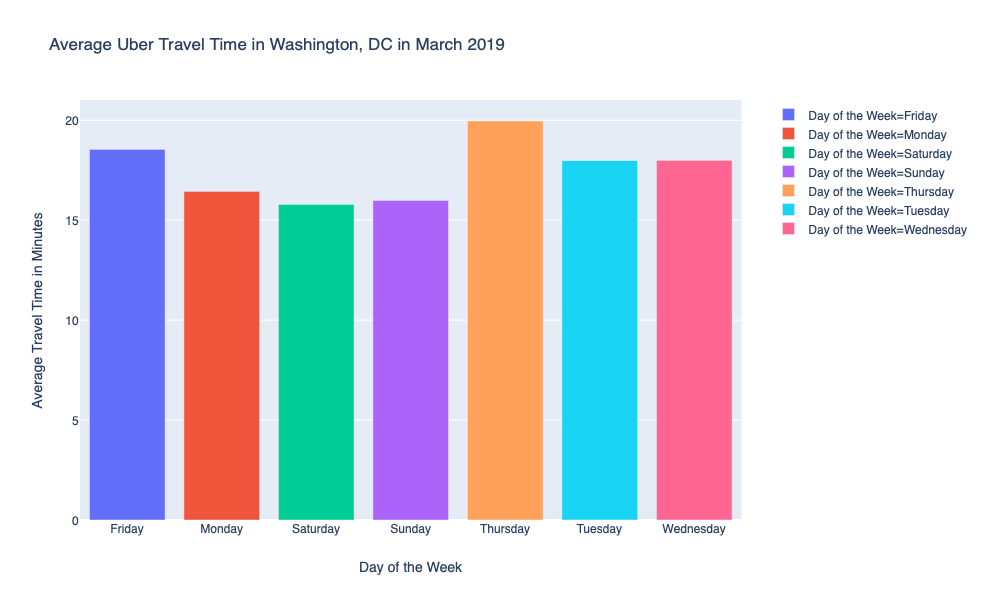

In [69]:
weekday_bar

In [74]:
# reorder our week day names so that we see Sunday-Saturday

# create a list of week day names in the correct order
weekday_name = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]
# use Catagorical to sort values into categories
df_average_time_day["Day Name"] = pd.Categorical(df_average_time_day["Day Name"],categories=weekday_name)
# sort values in our dataframe by the order that we defined
df_average_time_day = df_average_time_day.sort_values("Day Name")

In [75]:
# look at new, ordered dataframe
df_average_time_day

,Day Name,mean
3,Sunday,15.986010
1,Monday,16.439022
5,Tuesday,17.973280
6,Wednesday,17.993537
4,Thursday,19.959545
0,Friday,18.541256
2,Saturday,15.787503


## Bubble Chart Example with GDP Data 

We can also easily create timelapse visualizations with dataframes. This [super-engaging TED Talk](https://www.ted.com/talks/hans_rosling_shows_the_best_stats_you_ve_ever_seen?language=en) does a great job of telling a story with the data timelapse visualizations, and we'll learn how to re-create this with Plotly express below: 

In [70]:
# import pre-loaded dataset from Plotly express
gapminder = px.data.gapminder()

In [71]:
# look at our data
gapminder.head()

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
0,Afghanistan,Asia,1952,28.801,8425333,779.445314,AFG,4
1,Afghanistan,Asia,1957,30.332,9240934,820.853030,AFG,4
2,Afghanistan,Asia,1962,31.997,10267083,853.100710,AFG,4
3,Afghanistan,Asia,1967,34.020,11537966,836.197138,AFG,4
4,Afghanistan,Asia,1972,36.088,13079460,739.981106,AFG,4


In [84]:
# make a bubble chart
bubble_gdp = px.scatter(gapminder, x="gdpPercap", 
                        y="lifeExp", 
                        animation_frame="year", 
                        animation_group="country",
                        size="pop", 
                        color="continent", 
                        hover_name="country",
                        log_x=True, 
                        size_max=55, 
                        range_x=[100,100000], 
                        range_y=[25,90],
                        title = "How GDP per Capita, Life Expectancy, and Population Size Change Over Time (1952-2007)",
                       labels = {"gdpPercap": "GDP Per Capita", "lifeEx": "Life Expectancy"})

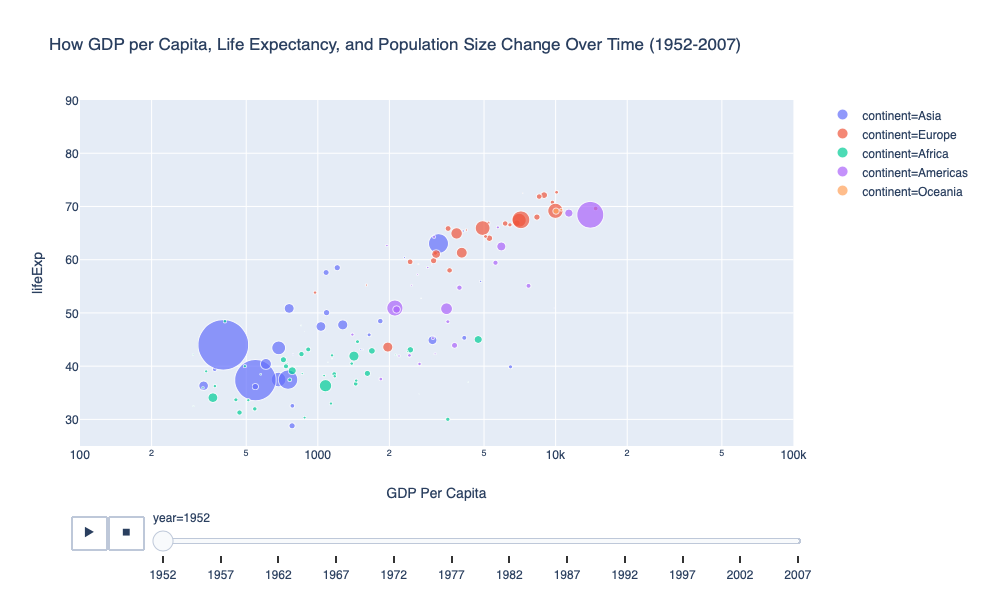

In [85]:
bubble_gdp